# Annual Income

To do
* Tune models
* Deal with missing data

https://archive.ics.uci.edu/dataset/2/adult

## Preliminaries

### Imports

In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.random import sample_without_replacement
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier

### Import the data

In [2]:
# fetch dataset 
adult = fetch_ucirepo(id=2).data.original 

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory data analysis

In [4]:
adult_eda = adult.copy()

In [5]:
adult_eda['income'] = adult_eda['income'].apply(lambda s: s[:-1] if s[-1]=='.' else s)

In [6]:
adult_eda = adult_eda.replace('?', np.nan)

In [7]:
adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
adult_eda.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
adult_eda.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<Axes: title={'center': 'Counts of high and low income observations containing null values'}, xlabel='income'>

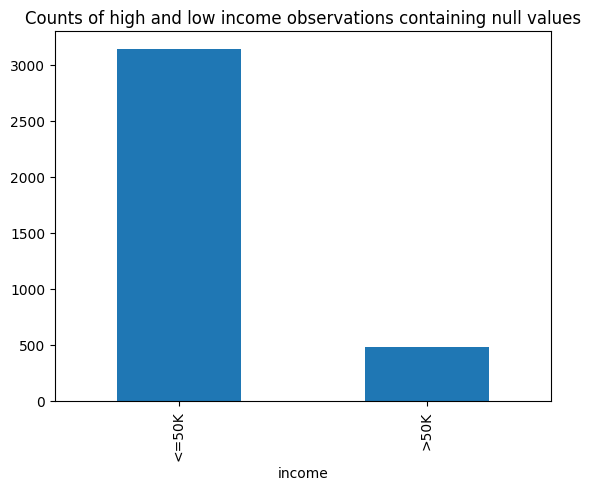

In [10]:
nulls = adult_eda[adult_eda.isna().any(axis=1)]
nulls['income'].value_counts().plot.bar(title='Counts of high and low income observations containing null values')

In [11]:
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
num_vars = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

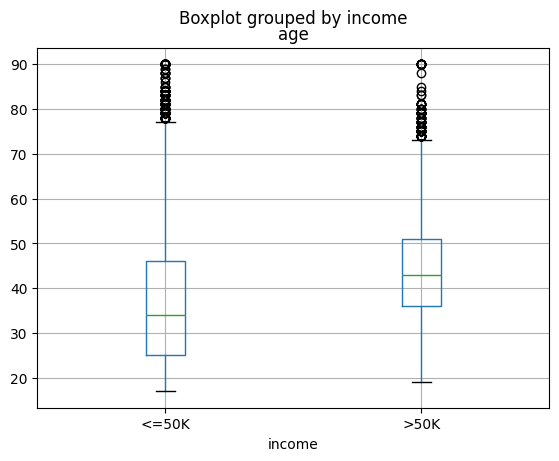

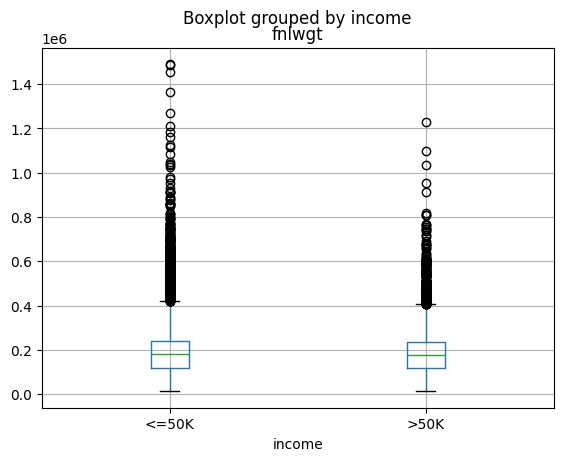

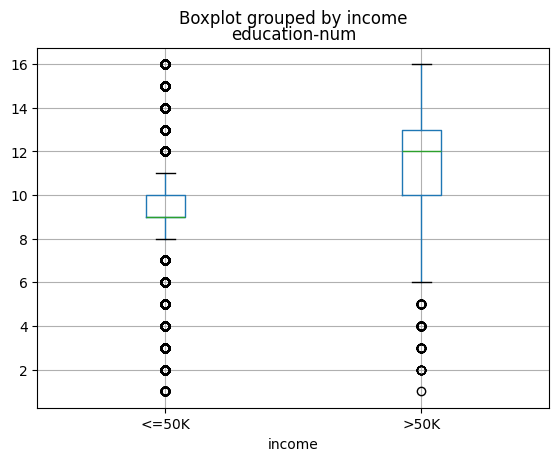

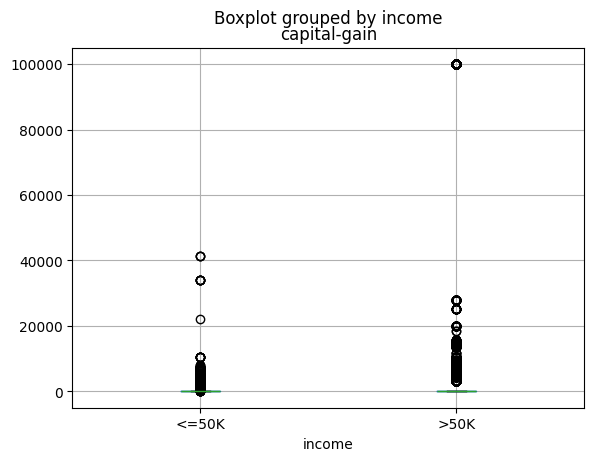

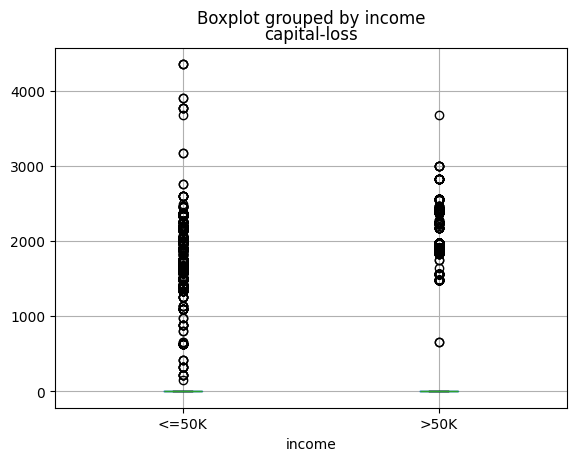

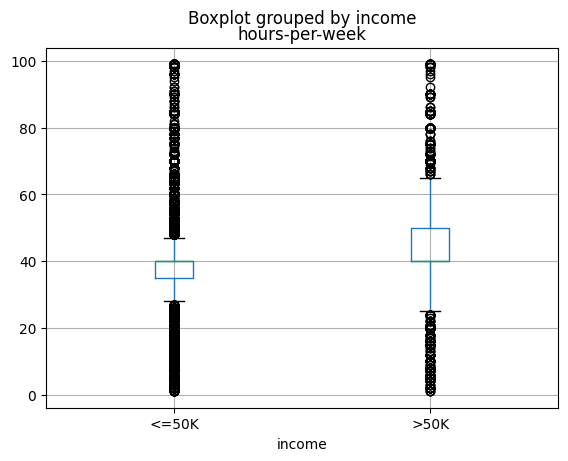

In [12]:
for num_var in num_vars:
    adult_eda.boxplot(column=num_var, by='income')

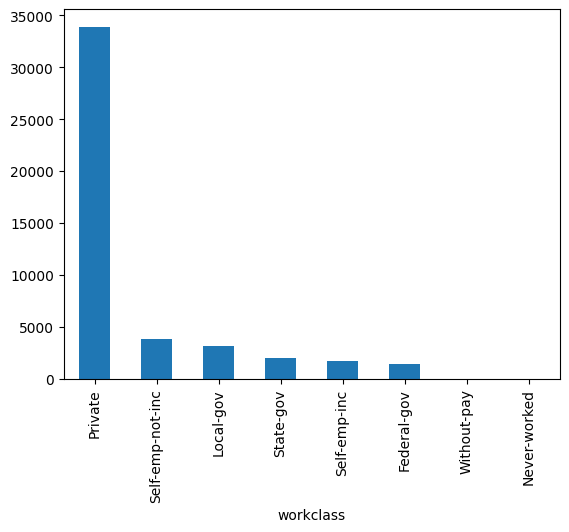

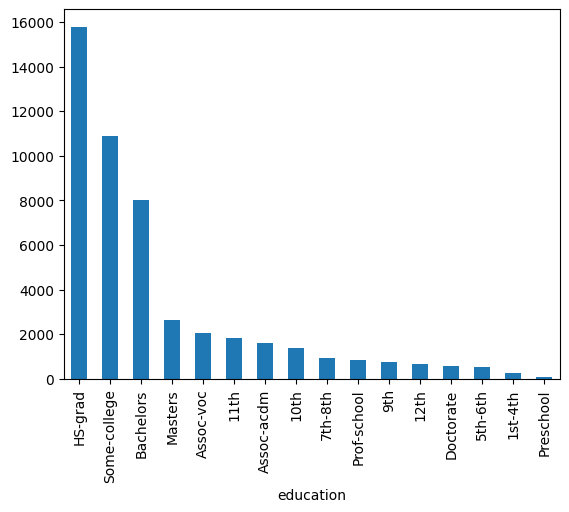

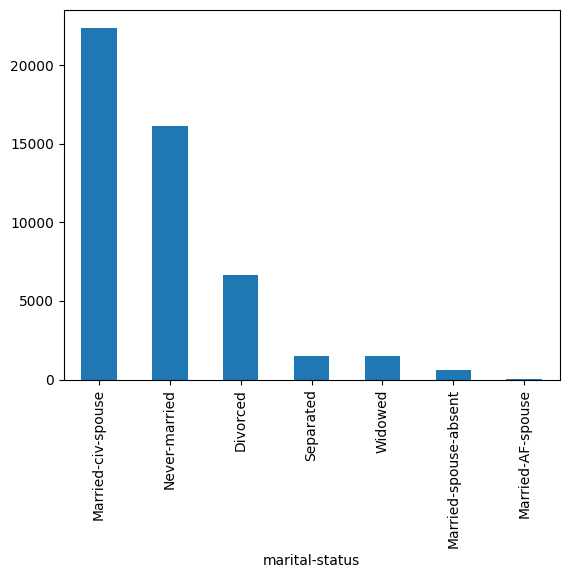

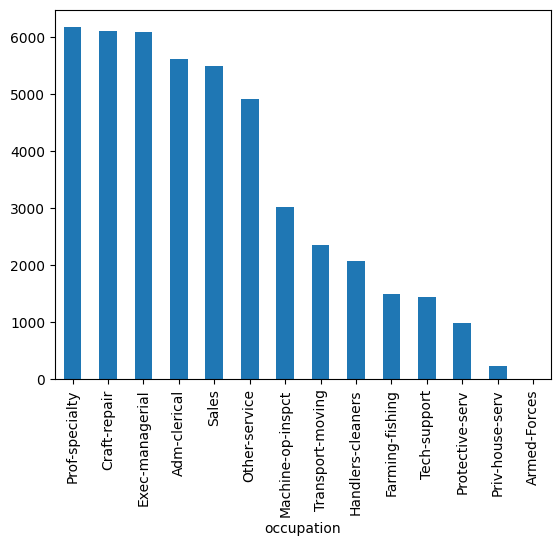

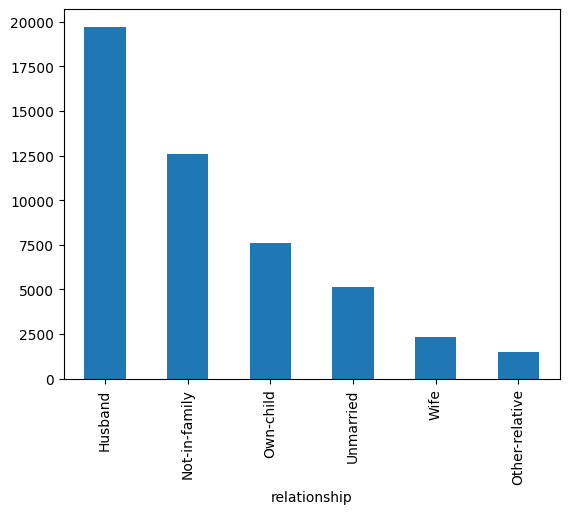

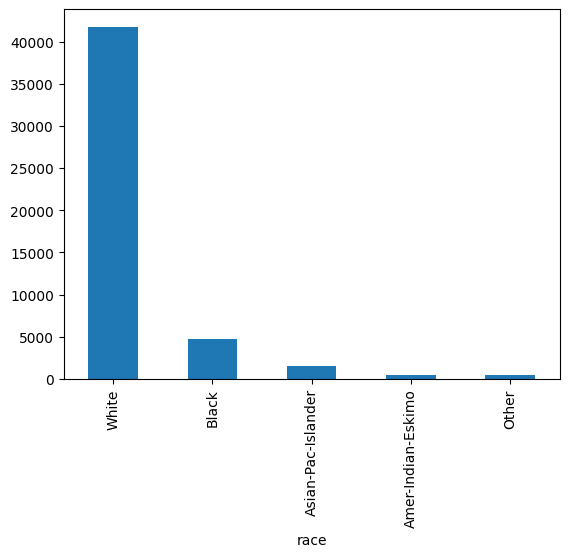

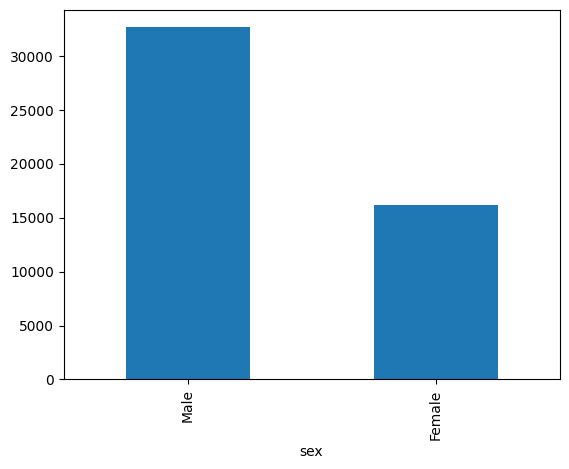

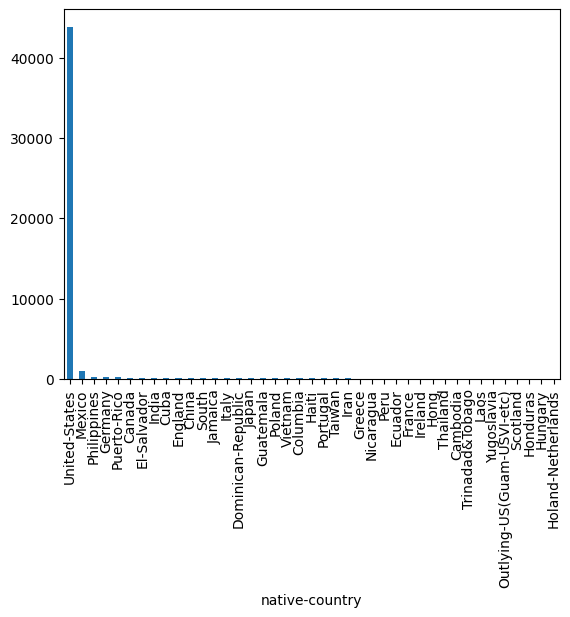

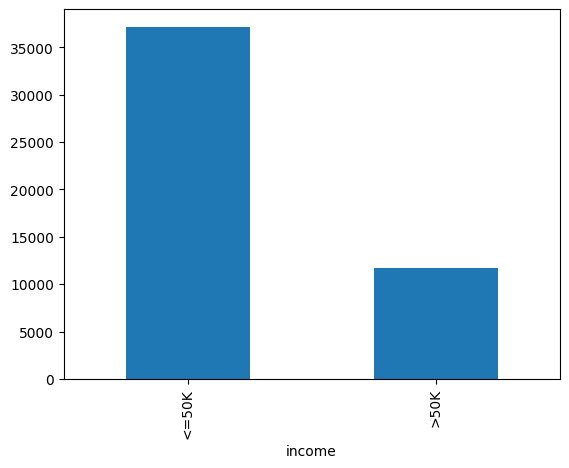

In [13]:
for cat_var in cat_vars:
    adult_eda[cat_var].value_counts().plot.bar()
    plt.show()

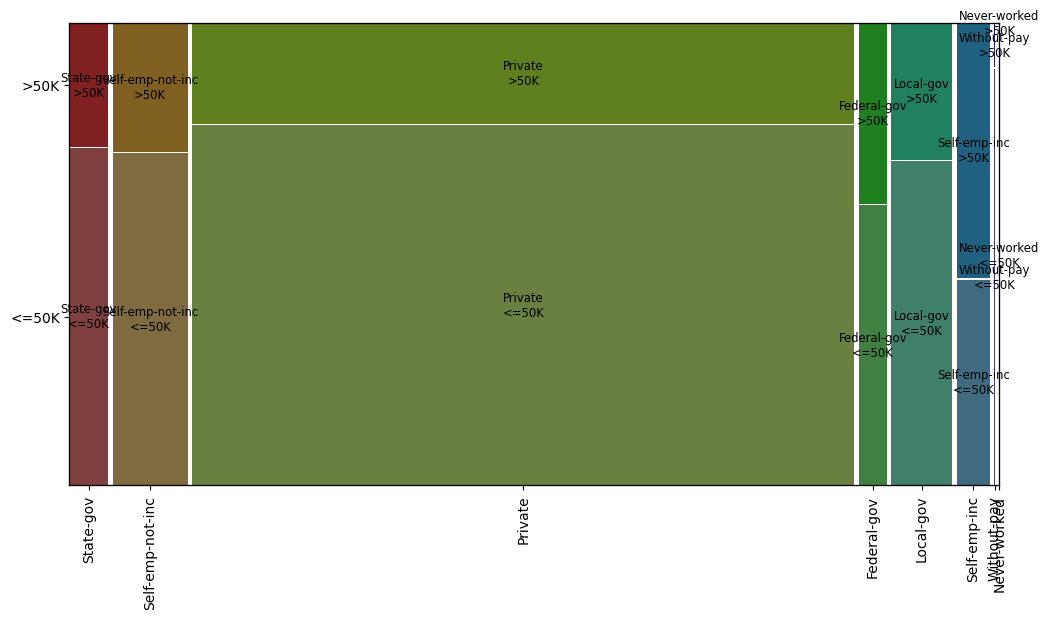

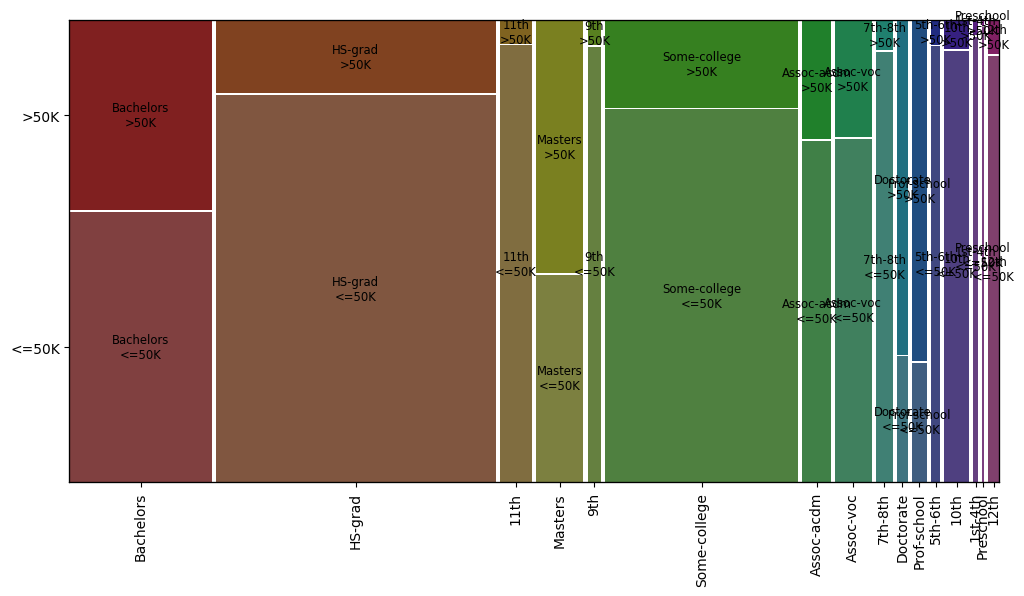

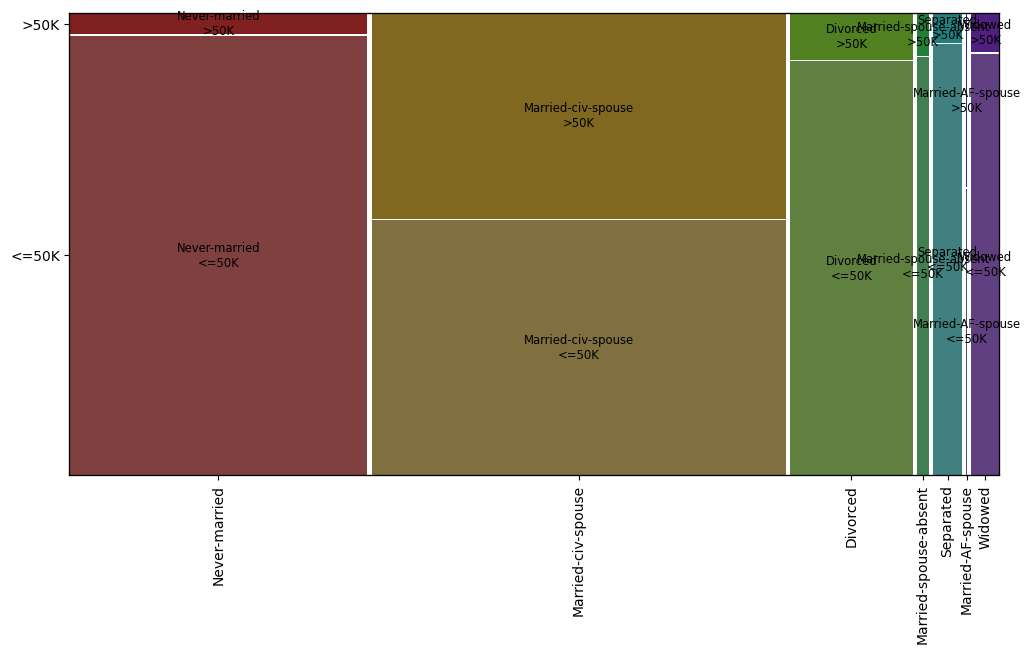

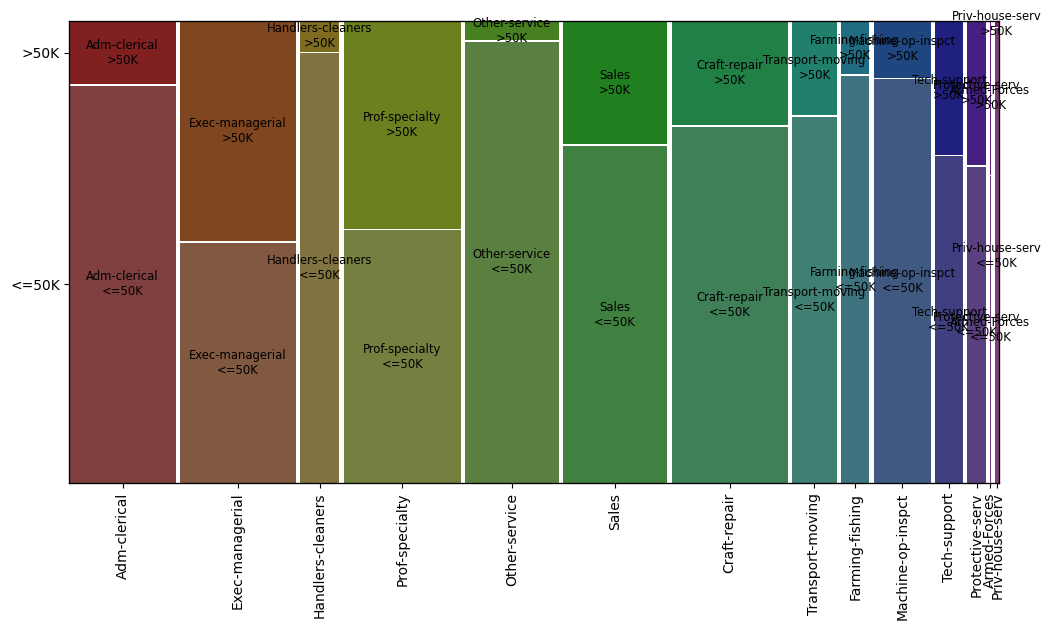

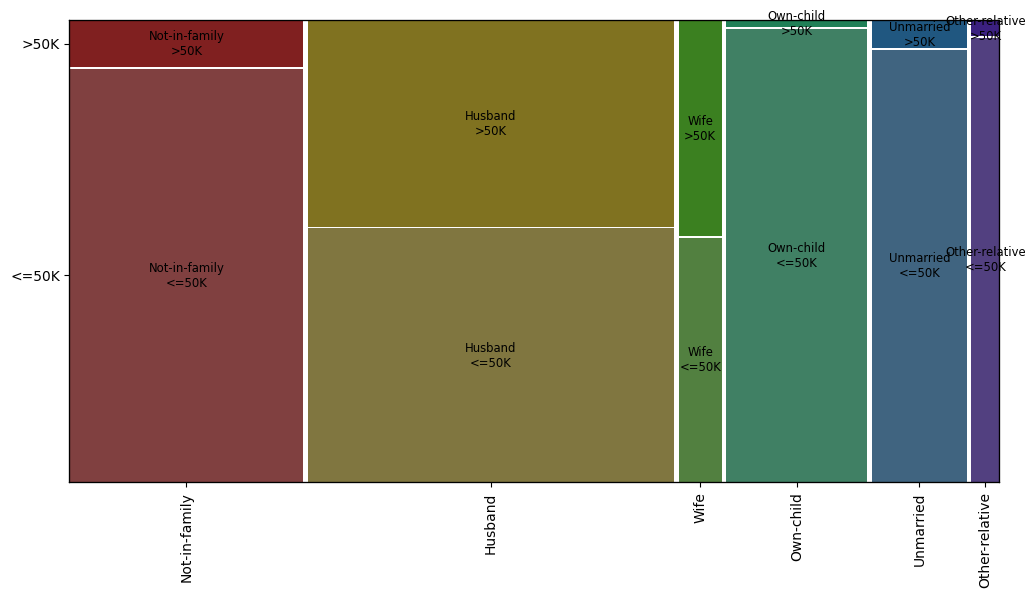

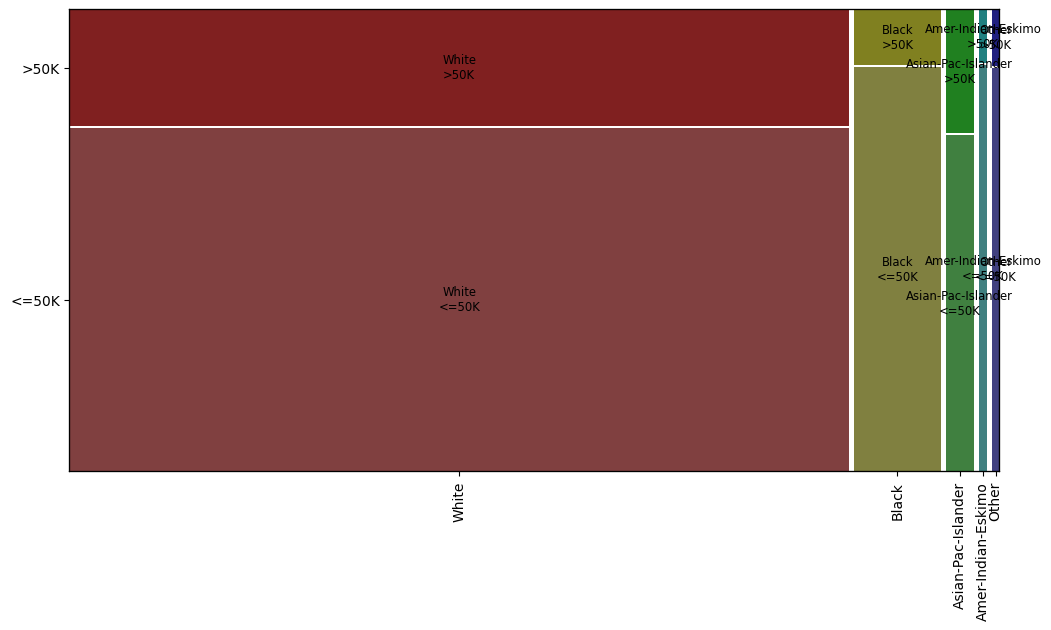

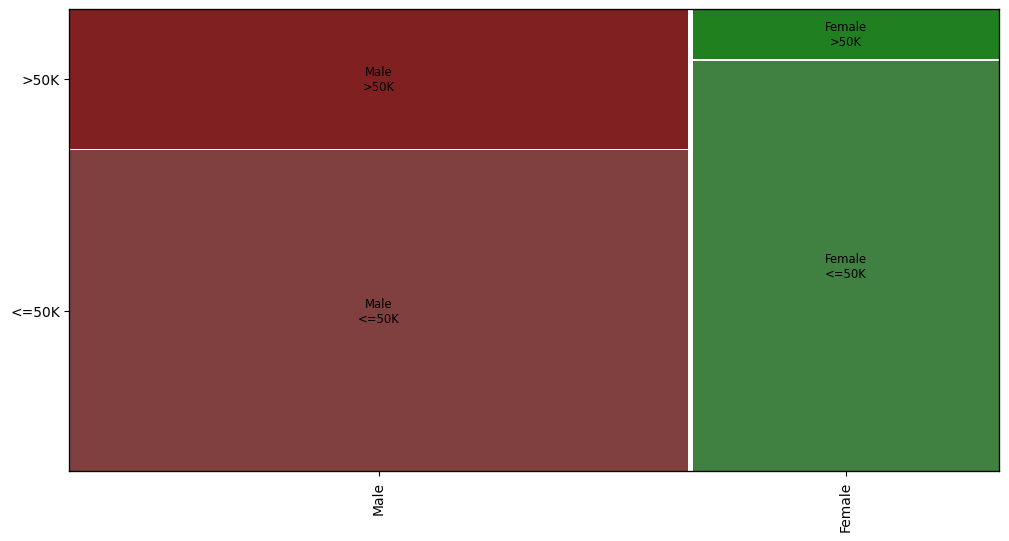

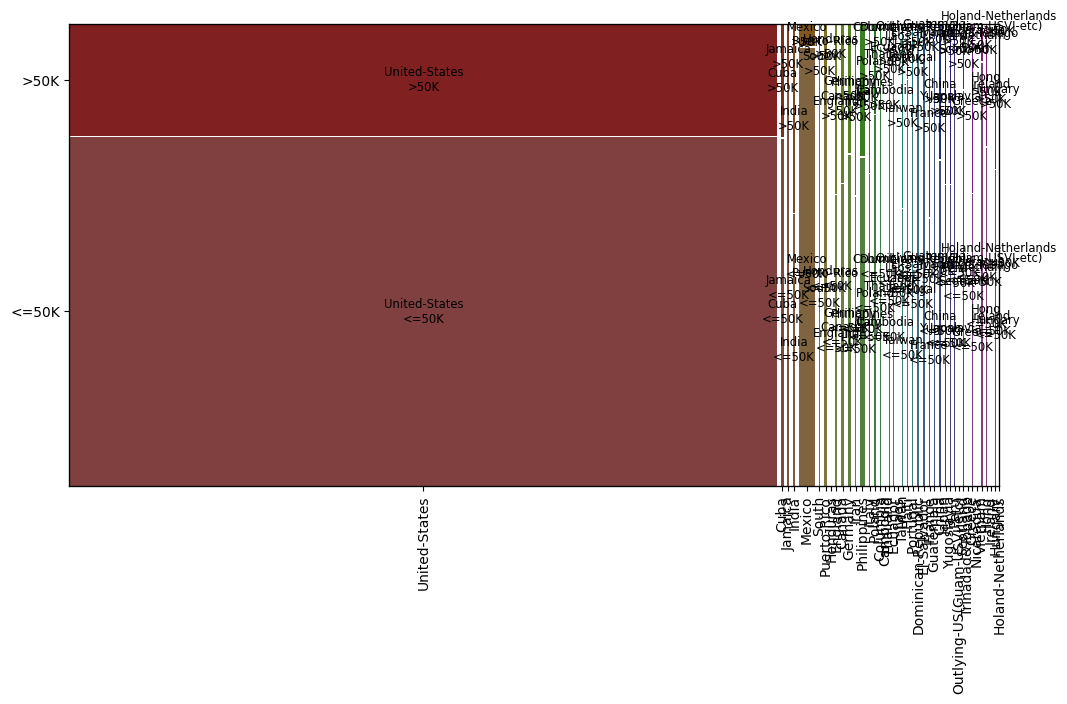

In [14]:
for cat_var in cat_vars:
    if cat_var != 'income':
        fig, ax = plt.subplots(figsize=(12, 6))
        mosaic(adult_eda[[cat_var, 'income']], [cat_var, 'income'], ax)
        ax.tick_params('x', labelrotation=90)
        plt.show()

In [15]:
adult_eda['age group'] = adult_eda['age'].apply(lambda n: f"{n//10}0s")
income_count_age = adult_eda[['age group', 'income']].groupby(['age group', 'income']).size().reset_index().rename({0: 'count'}, axis=1)
high_income_count_age = income_count_age[income_count_age['income'] == '>50K']
low_income_count_age = income_count_age[income_count_age['income'] == '<=50K']

Text(0.5, 1.0, 'Count of high/low earners by age group')

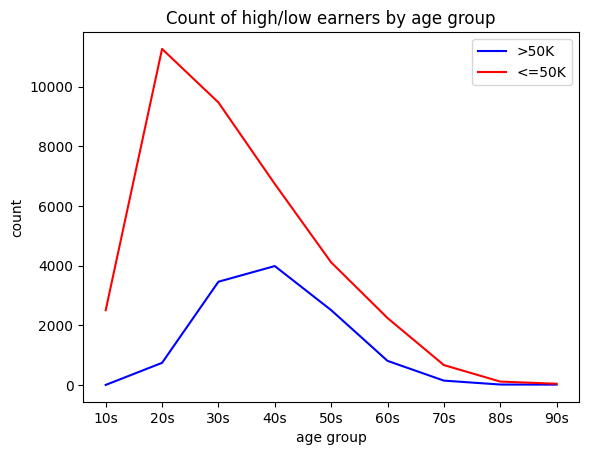

In [16]:
fig, ax = plt.subplots()
ax.plot(high_income_count_age['age group'], high_income_count_age['count'], c='b', label='>50K')
ax.plot(low_income_count_age['age group'], low_income_count_age['count'], c='r', label='<=50K')
ax.set_xlabel('age group')
ax.set_ylabel('count')
ax.legend()
ax.set_title('Count of high/low earners by age group')

## Preprocessing

### Utility methods

In [17]:
# Generalized into private, public, self-employed, business owner and unemployed
def generalize_workclass(workclass):
    if (workclass=="Private" or workclass=="Self-emp-not-inc" or workclass=="Self-emp-inc"):
        return workclass
    elif (workclass=="Federal-gov" or workclass=="Local-gov" or workclass=="State-gov"):
        return "Public"
    elif (workclass=="Without-pay" or workclass=="Never-worked"):
        return "Unemployed"
    return "?"

In [18]:
# Generalized into preschool, elementary/middle school, high school, university and vocational
def generalize_education(edu):
    if (edu=="Preschool"):
        return "Preschool"
    elif (edu=="1st-4th" or edu=="5th-6th" or edu=="7th-8th"):
        return "School"
    elif (edu=="9th" or edu=="10th" or edu=="11th" or edu=="12th" or edu=="HS-grad"):
        return "High-school"
    elif (edu == "Bachelors" or edu=="Some-college" or edu=="Masters" or edu=="Doctorate" or edu=="Prof-school" or edu=="Assoc-acdm"):
        return "University"
    elif (edu=="Assoc-voc"):
        return "Vocational"
    return "?"

In [19]:
# Generalized into married and not married
def generalize_marital_status(status):
    if (status=="Married-civ-spouse" or status=="Married-spouse-absent" or status=="Married-AF-spouse"):
        return "Married"
    elif (status=="Divorced" or status=="Never-married" or status=="Separated" or status=="Widowed"):
        return "Not-married"
    return "?"

In [20]:
# Generalized into skilled, unskilled, military/protection and farming/fishing
def generalize_occupation(occupation):
    if (occupation=="Exec-managerial" or occupation=="Prof-specialty" or occupation=="Craft-repair" or occupation=="Tech-support"):
        return "Skilled"
    elif (occupation=="Other-service" or occupation=="Handlers-cleaners" or occupation=="Adm-clerical" or occupation=="Transport-moving" or occupation=="Priv-house-serv" or occupation=="Machine-op-inspct" or occupation=="Sales"):
        return "Unskilled"
    elif (occupation=="Protective-serv" or occupation=="Armed-Forces"):
        return "Mil-pro-serv"
    elif (occupation=="Farming-fishing"):
        return occupation
    return "?"

In [21]:
# Generalized into family and non-family
def generalize_relationship(relationship):
    if (relationship=="Wife" or relationship=="Own-child" or relationship=="Husband" or relationship=="Other-relative"):
        return "Family"
    elif(relationship=="Not-in-family" or relationship=="Unmarried"):
        return "Non-family"
    return "?"

In [22]:
'''
Countries have been classified following the IMF's 2024 groupings (https://www.imf.org/en/Publications/WEO/weo-database/2024/April/groups-and-aggregates) 
with the exception of "Outlying-US(Guam-USVI-etc)" which is not categorized by the IMF and which has been included in the "Developing" group here.
'''
def generalize_native_country(country):
    if (country=="United-States" or country=="England" or country=="Canada" or country=="Germany" or country=="Japan" or country=="Greece" or country=="Italy" or country=="Portugal" or country=="Puerto-Rico" or country=="Ireland" or country=="France" or country=="Taiwan" or country=="Scotland" or country=="Hong" or country=="Holand-Netherlands"):
        return "Advanced"
    elif (country=="Cambodia" or country=="Outlying-US(Guam-USVI-etc)" or country=="India" or country=="South" or country=="China" or country=="Cuba" or country=="Iran" or country=="Honduras" or country=="Philippines" or country=="Poland" or country=="Jamaica" or country=="Vietnam" or country=="Mexico" or country=="Dominican-Republic" or country=="Laos" or country=="Ecuador" or country=="Haiti" or country=="Columbia" or country=="Hungary" or country=="Guatemala" or country=="Nicaragua" or country=="Thailand" or country=="Yugoslavia" or country=="El-Salvador" or country=="Trinadad&Tobago" or country=="Peru"):
        return "Developing"
    return "?"

In [23]:
def generalize(df):
    df["workclass"] = df['workclass'].apply(lambda workclass: generalize_workclass(workclass))
    df["education"] = df['education'].apply(lambda education: generalize_education(education))
    df["marital-status"] = df['marital-status'].apply(lambda marital_status: generalize_marital_status(marital_status))
    df["occupation"] = df['occupation'].apply(lambda occupation: generalize_occupation(occupation))
    df['relationship'] = df['relationship'].apply(lambda relationship: generalize_relationship(relationship))
    df['native-country'] = df['native-country'].apply(lambda native_country: generalize_native_country(native_country))
    return df

### Pipeline

In [24]:
preprocessed = adult.copy()

In [25]:
# Cleaning data
preprocessed["income"] = preprocessed["income"].apply(lambda s: s[0:-1] if s[-1]=="." else s)
preprocessed = preprocessed.replace('?', np.nan)
preprocessed = preprocessed.dropna()

In [26]:
preprocessed = generalize(preprocessed)

In [27]:
# Creating dummy variables for categorical predictors
cat_vars = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country", "income"]
preprocessed = pd.get_dummies(preprocessed, columns=cat_vars, drop_first=True, dtype=int)

In [28]:
# Creating interaction terms
preprocessed['male_white'] = preprocessed['sex_Male'] * preprocessed['race_White']
preprocessed['university_white'] = preprocessed['education_University'] * preprocessed['race_White']

In [29]:
preprocessed.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Public,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_Unemployed,...,relationship_Non-family,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Developing,income_>50K,male_white,university_white
0,39,77516,13,2174,0,40,1,0,0,0,...,1,0,0,0,1,1,0,0,1,1
1,50,83311,13,0,0,13,0,0,1,0,...,0,0,0,0,1,1,0,0,1,1
2,38,215646,9,0,0,40,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [30]:
preprocessed.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Public', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_Unemployed',
       'education_Preschool', 'education_School', 'education_University',
       'education_Vocational', 'marital-status_Not-married',
       'occupation_Mil-pro-serv', 'occupation_Skilled', 'occupation_Unskilled',
       'relationship_Non-family', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Male', 'native-country_Developing',
       'income_>50K', 'male_white', 'university_white'],
      dtype='object')

In [31]:
# Separating holdout and test/train data
X_test_train, X_holdout, y_test_train, y_holdout = train_test_split(
    preprocessed.drop('income_>50K', axis=1), preprocessed.loc[:, "income_>50K"], test_size=0.2, random_state=42)

In [32]:
# Separating test and train data
X_train, X_test, y_train, y_test = train_test_split(
    X_test_train, y_test_train, test_size=0.2, random_state=42)

In [33]:
# Bootstrapping
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [34]:
y_train_over.groupby(y_train_over).count()

income_>50K
0    21770
1    21770
Name: income_>50K, dtype: int64

## Modelling

### Metrics for comparison

There are a number of different metrics that can be used to evaluate trained models (e.g. accuracy, error rate, sensitivity, precision) and selecting one depends on the broader context. For example, if we are predicting whether people have a genetic predisposition to a disease so that they can be invited for screening it is much more desirable to invite someone to a screening who doesn't need it rather than not invite someone to a screening who does need it. In this scenario specificity (TN/TN + FP) might be a desirable metric to maximise.
For the purposes of this project, I will assume that I am working on behalf of a luxury retailer that would like to target an advertising campaign at individuals with a relatively high income. The key here is to ensure that as much of the advertising budget as possible is spent on serving advertisements to people who are on a high income. Thus precision (TP / TP + FP) is a suitable metric for the purposes of this project.

### Analysis

The number of >50k observations significantly outnumbers the number of =<50k observations. I have experimented with bootstapping in order to see if having an equal number of >50k and =<50k observations improves model performance. I have not used bootstrapping with the SVM models as they already suffer from computational efficiency issues that would be compounded by including more training observations. Bootstrapping has lead to small improvements in test F1 scores for most models, the exception being KNN where it lead to a significant improvement. Generally speaking these small improvements in test F1 scores were underpinned by a significant improvement in terms of recall which outweighed a smaller drop in precision. In other words, bootsrapping has lead to models correctly identifying a greater proportion of the target audience (high earners) but has also resulted in a greater proportion of positive predictions (that an observation is a high earner) being false. Any resulting marketing campaign would therefore reach a greater proportion of its target audience at the expense of wasting a greater proportion of the advertising spend serving advertisements to people outside of the target audience. How to resolve this tradeoff is heavily context dependent, for example if the advertising budget was relatively small this could lead to opting for the model with higher precision whereas if the advertising budget was larger recall might be prioritised. In this instance I have decided to follow the bootstrapping approach which results in higher recall and a higher F1 score on the test data at the expense of lower precision.

### Utility methods

In [35]:
def error_rate(actual, predicted):
    return np.mean(actual != predicted)

In [36]:
def labelled_confusion_matrix(actual, predicted):
    columns = pd.MultiIndex.from_tuples([("predicted", "income_<=50K"), ("predicted", "income_>50K")])
    indicies = pd.MultiIndex.from_tuples([("actual", "income_<=50K"), ("actual", "income_>50K")])
    return pd.DataFrame(confusion_matrix(actual, predicted), index=indicies, columns=columns)

In [37]:
def recall(actual, predicted):
    df = pd.DataFrame({"actual": actual, "predicted": predicted})
    tp = df[(df.actual == 1) & (df.predicted==1)].shape[0]
    fn = df[(df.actual==1) & (df.predicted==0)].shape[0]
    return tp/(tp + fn)

In [38]:
def precision(actual, predicted):
    df = pd.DataFrame({"actual": actual, "predicted": predicted})
    tp = df[(df.actual == 1) & (df.predicted==1)].shape[0]
    fp = df[(df.actual==0) & (df.predicted==1)].shape[0]
    return tp/(tp + fp)

In [39]:
def f1(actual, predicted):
    pr = precision(actual, predicted)
    re = recall(actual, predicted)
    return (2 * pr * re)/(pr + re)

In [40]:
def evaluate_model(actual, predicted):
    print(f"***Confusion Matrix***\n{labelled_confusion_matrix(actual, predicted)}\n\n***Error rate***\n{error_rate(actual, predicted)}\n\n***Recall***\n{recall(actual, predicted)}\n\n***Precision***\n{precision(actual, predicted)}\n\n***F1 score***\n{f1(actual, predicted)}")

### KNN

In [128]:
knn = KNeighborsClassifier()
distributions = {"n_neighbors": [2, 4, 8, 16, 32]}
knn_search = RandomizedSearchCV(knn, distributions, random_state=0)
knn_search.fit(X_train, y_train)

/Users/jon.wong/Documents/Personal Development/Kaggle/annual-income/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 4, 8, 16, 32]},
                   random_state=0)

In [129]:
knn_search.best_params_

{'n_neighbors': 16}

In [130]:
# Train evaluation
evaluate_model(y_train, knn_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        21528         242
       income_>50K          5622        1549

***Error rate***
0.20261912166131094

***Recall***
0.2160089248361456

***Precision***
0.8648799553322166

***F1 score***
0.3456817674626199


In [131]:
# Test evaluation
evaluate_model(y_test, knn_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5427          72
       income_>50K          1388         349

***Error rate***
0.2017689331122167

***Recall***
0.20092112838226828

***Precision***
0.828978622327791

***F1 score***
0.3234476367006487


#### Oversampling

In [132]:
knn_over = KNeighborsClassifier()
knn_over_search = RandomizedSearchCV(knn_over, distributions, random_state=0)
knn_over_search.fit(X_train_over, y_train_over)

/Users/jon.wong/Documents/Personal Development/Kaggle/annual-income/.venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [2, 4, 8, 16, 32]},
                   random_state=0)

In [133]:
knn_search.best_params_

{'n_neighbors': 16}

In [134]:
# Train evaluation with oversampling
evaluate_model(y_train, knn_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        21528         242
       income_>50K          5622        1549

***Error rate***
0.20261912166131094

***Recall***
0.2160089248361456

***Precision***
0.8648799553322166

***F1 score***
0.3456817674626199


In [135]:
# Test evaluation with oversampling
evaluate_model(y_test, knn_over_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         4602         897
       income_>50K           961         776

***Error rate***
0.25677169707020453

***Recall***
0.44674726540011517

***Precision***
0.4638374178123132

***F1 score***
0.45513196480938417


### Logistic regression

In [41]:
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
result = model.fit()

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            income_>50K   No. Observations:                28941
Model:                            GLM   Df Residuals:                    28914
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10184.
Date:                Wed, 16 Jul 2025   Deviance:                       20368.
Time:                        09:09:13   Pearson chi2:                 3.02e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3403
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                            0.0168      0.001     11.231      0.000       0.014       0.020
fnlwgt                      3.022e-07   1.71e-07      1.772      0.076    -3.2e-08    6.36e-07
education-num                  0.1685      0.012     14.533      0.000       0.146       0.191
capital-gain                   0.0003   1.06e-05     30.575      0.000       0.000       0.000
capital-loss                   0.0007   3.79e-05     17.896      0.000       0.001       0.001
hours-per-week                 0.0140      0.002      9.204      0.000       0.011       0.017
workclass_Public              -0.0630      0.051     -1.229      0.219      -0.163       0.037
workclass_Self-emp-inc         0.4281      0.084      5.122      0.000       0.264       0.592
workclass_Self-emp-not-inc    -0.6038      0.063     -9.600      0.000      -0.727      -0.481
workclass_Unemployed         -21.3569   1.14e+04     -0.002      0.999   -2.24e+04    2.23e+04
education_Preschool           -5.5757      7.409     -0.753      0.452     -20.096       8.945
education_School              -0.5699      0.165     -3.453      0.001      -0.893      -0.246
education_University          -0.0292      0.115     -0.254      0.800      -0.255       0.196
education_Vocational           0.2257      0.086      2.611      0.009       0.056       0.395
marital-status_Not-married    -2.8279      0.080    -35.444      0.000      -2.984      -2.672
occupation_Mil-pro-serv       -0.2071      0.140     -1.478      0.139      -0.482       0.068
occupation_Skilled            -0.0181      0.093     -0.195      0.846      -0.200       0.164
occupation_Unskilled          -0.7013      0.092     -7.656      0.000      -0.881      -0.522
relationship_Non-family        0.2778      0.082      3.371      0.001       0.116       0.439
race_Asian-Pac-Islander       -2.2010      0.174    -12.643      0.000      -2.542      -1.860
race_Black                    -2.9077      0.143    -20.356      0.000      -3.188      -2.628
race_Other                    -2.8550      0.265    -10.770      0.000      -3.375      -2.335
race_White                    -3.6045      0.134    -26.898      0.000      -3.867      -3.342
sex_Male                      -0.9290      0.106     -8.781      0.000      -1.136      -0.722
native-country_Developing     -0.5654      0.095     -5.940      0.000      -0.752      -0.379
male_white                     0.9816      0.115      8.555      0.000       0.757       1.207
university_white               0.6732      0.112      6.015      0.000       0.454       0.893
==============================================================================================
"""

In [43]:
# Train evaluation
evaluate_model(y_train, list(map(lambda n: 1 if  n > 0.5 else 0, result.predict()))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        20026        1744
       income_>50K          2981        4190

***Error rate***
0.16326319062921116

***Recall***
0.584297866406359

***Precision***
0.7061004381530165

***F1 score***
0.639450591377337


In [44]:
# Test evaluation
evaluate_model(y_test, list(map(lambda n: 1 if  n > 0.5 else 0, result.predict(X_test)))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5013         486
       income_>50K           726        1011

***Error rate***
0.16749585406301823

***Recall***
0.5820379965457686

***Precision***
0.6753507014028056

***F1 score***
0.6252319109461967


#### Oversampling

In [73]:
model_over = sm.GLM(y_train_over, X_train_over, family=sm.families.Binomial())
result_over = model_over.fit()

In [74]:
result_over.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            income_>50K   No. Observations:                43540
Model:                            GLM   Df Residuals:                    43515
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18115.
Date:                Tue, 15 Jul 2025   Deviance:                       36229.
Time:                        19:20:54   Pearson chi2:                 6.08e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4255
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
age                            0.0227      0.001     19.579      0.000       0.020       0.025
fnlwgt                      2.168e-07   1.27e-07      1.714      0.087   -3.11e-08    4.65e-07
education-num                  0.1856      0.009     20.646      0.000       0.168       0.203
capital-gain                   0.0003   8.67e-06     35.947      0.000       0.000       0.000
capital-loss                   0.0006   3.03e-05     21.070      0.000       0.001       0.001
hours-per-week                 0.0210      0.001     17.327      0.000       0.019       0.023
workclass_Public              -0.0821      0.039     -2.129      0.033      -0.158      -0.007
workclass_Self-emp-inc         0.4687      0.067      7.035      0.000       0.338       0.599
workclass_Self-emp-not-inc    -0.5262      0.046    -11.374      0.000      -0.617      -0.436
workclass_Unemployed         -23.2864   1.73e+04     -0.001      0.999    -3.4e+04    3.39e+04
education_Preschool           -1.2104      0.777     -1.557      0.119      -2.734       0.313
education_School              -0.4686      0.110     -4.253      0.000      -0.685      -0.253
education_University           0.5275      0.041     12.873      0.000       0.447       0.608
education_Vocational           0.2286      0.065      3.543      0.000       0.102       0.355
marital-status_Not-married    -2.9592      0.060    -49.347      0.000      -3.077      -2.842
occupation_Mil-pro-serv        0.0264      0.112      0.236      0.813      -0.193       0.246
occupation_Skilled             0.2077      0.077      2.691      0.007       0.056       0.359
occupation_Unskilled          -0.4531      0.076     -5.943      0.000      -0.603      -0.304
relationship_Non-family        0.4705      0.062      7.633      0.000       0.350       0.591
race_Asian-Pac-Islander       -3.0749      0.141    -21.852      0.000      -3.351      -2.799
race_Black                    -3.6698      0.122    -30.015      0.000      -3.909      -3.430
race_Other                    -3.6236      0.198    -18.290      0.000      -4.012      -3.235
race_White                    -3.3263      0.112    -29.723      0.000      -3.546      -3.107
sex_Male                      -0.0091      0.035     -0.259      0.796      -0.078       0.060
native-country_Developing     -0.5756      0.068     -8.443      0.000      -0.709      -0.442
==============================================================================================
"""

In [75]:
# Train evaluation with oversampling
evaluate_model(y_train_over, list(map(lambda n: 1 if  n > 0.5 else 0, result_over.predict()))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        16717        5053
       income_>50K          3617       18153

***Error rate***
0.19912723932016538

***Recall***
0.8338539274230593

***Precision***
0.7822545893303456

***F1 score***
0.807230522945571


In [76]:
# Test evaluation
evaluate_model(y_test, list(map(lambda n: 1 if  n > 0.5 else 0, result_over.predict(X_test)))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         4202        1297
       income_>50K           301        1436

***Error rate***
0.22084024322830292

***Recall***
0.82671272308578

***Precision***
0.5254299304793267

***F1 score***
0.6425055928411634


### SVM

In [37]:
svm_train_indicies = sample_without_replacement(X_train.shape[0], 10000, random_state=42)
svm_test_indicies = sample_without_replacement(X_test.shape[0], 1200, random_state=42)

In [38]:
X_train_svm = X_train.iloc[svm_train_indicies]
y_train_svm = y_train.iloc[svm_train_indicies]
X_test_svm = X_test.iloc[svm_test_indicies]
y_test_svm = y_test.iloc[svm_test_indicies]

#### Support vector classifier

In [ ]:
svc = svm.SVC(kernel="linear")
distributions = {"C": [0.1, 1, 10, 100]}
svc_search = GridSearchCV(svc, distributions)
svc_search.fit(X_train, y_train)

In [ ]:
svc_search.best_params_

SVC(kernel='linear')

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svc_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_test_svm, svc_search.predict(X_test_svm))

#### SVM with polynomial kernel

In [ ]:
svm_poly = svm.SVC(kernel="poly")
distributions = {"C": [0.1, 1, 10, 100],
                 "d": 3}
svm_poly_search = GridSearchCV(svm_poly, distributions)
svm_poly_search.fit(X_train, y_train)

In [ ]:
svm_poly_search.best_params_

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svm_poly_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_train_svm, svm_poly_search.predict(X_test_svm))

#### SVM with radial basis function

In [ ]:
svm_rbf = svm.SVC(kernel="rbf")
distributions = {"C": [0.1, 1, 10, 100],
                 "gamma": [0.1, 1, 10, 100]}
svm_rbf_search = RandomizedSearchCV(svm_rbf, distributions, n_iter=10, random_state=0)
svm_rbf_search.fit(X_train, y_train)

In [ ]:
svm_rbf_search.best_params_

In [ ]:
# Train evaluation
evaluate_model(y_train_svm, svm_rbf_search.predict(X_train_svm))

In [ ]:
# Test evaluation
evaluate_model(y_train_svm, svm_rbf_search.predict(X_test_svm))

### Tree-based methods

#### Decision tree

In [77]:
dt = DTC(criterion='gini', max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

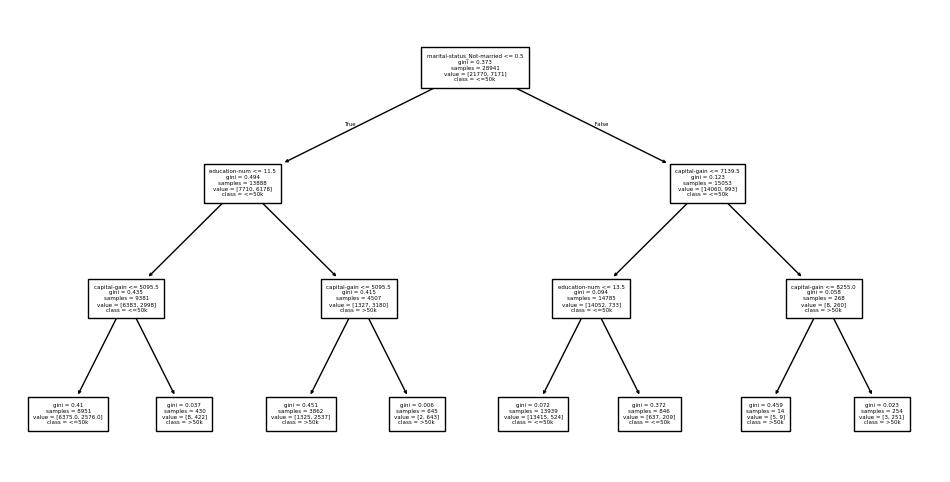

In [78]:
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X_train.columns, class_names=['<=50k', '>50k'], fontsize=4)
plt.show()

In [79]:
# Train evaluation
evaluate_model(y_train, dt.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        20427        1343
       income_>50K          3309        3862

***Error rate***
0.1607408175253101

***Recall***
0.5385580811602287

***Precision***
0.7419788664745437

***F1 score***
0.6241111829347123


In [80]:
# Test evaluation
evaluate_model(y_test, dt.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5103         396
       income_>50K           830         907

***Error rate***
0.16943062465450526

***Recall***
0.5221646516983305

***Precision***
0.6960859554873369

***F1 score***
0.5967105263157895


##### Oversampling

In [81]:
dt_over = DTC(criterion='gini', max_depth=3)
dt_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3)

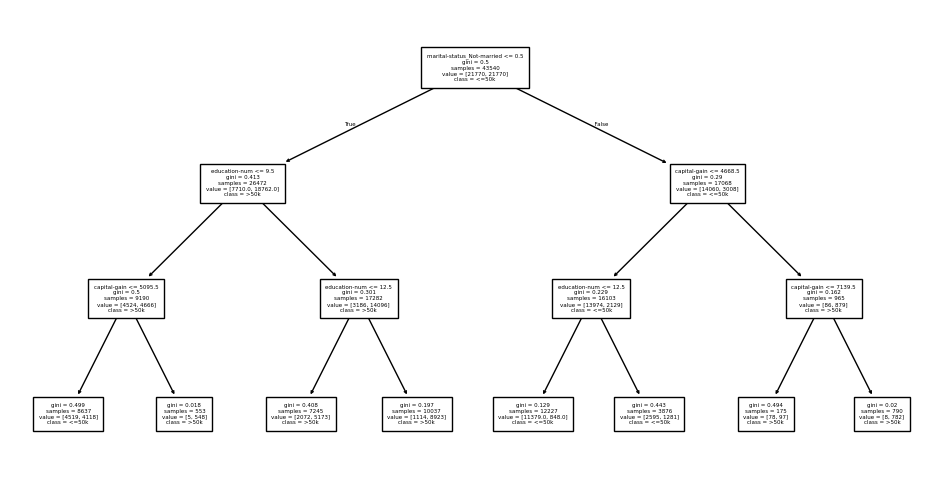

In [82]:
plt.figure(figsize=(12, 6))
plot_tree(dt_over, feature_names=X_train_over.columns, class_names=['<=50k', '>50k'], fontsize=4)
plt.show()

In [83]:
# Train evaluation
evaluate_model(y_train_over, dt_over.predict(X_train_over))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        18493        3277
       income_>50K          6247       15523

***Error rate***
0.2187413872301332

***Recall***
0.7130454754248966

***Precision***
0.8256914893617021

***F1 score***
0.7652452551146166


In [84]:
# Test evaluation
evaluate_model(y_test, dt_over.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         4637         862
       income_>50K           518        1219

***Error rate***
0.19071310116086235

***Recall***
0.7017846862406448

***Precision***
0.5857760691975012

***F1 score***
0.6385542168674699


#### Bagging

In [85]:
bg = RandomForestClassifier(max_features=X_train.shape[1], random_state=42)
distributions = {"n_estimators": [50, 100, 200, 400],
                 "max_depth": [2, 4, 8, 16]}
bg_search = RandomizedSearchCV(bg, distributions, n_iter=10, random_state=0)
bg_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(max_features=25,
                                                    random_state=42),
                   param_distributions={'max_depth': [2, 4, 8, 16],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [86]:
bg_search.best_params_

{'n_estimators': 100, 'max_depth': 16}

In [87]:
# Train evaluation
evaluate_model(y_train, bg_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        21035         735
       income_>50K          1517        5654

***Error rate***
0.07781348260253619

***Recall***
0.7884534932366476

***Precision***
0.8849585224604789

***F1 score***
0.8339233038348082


In [88]:
# Test evaluation
evaluate_model(y_test, bg_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5123         376
       income_>50K           685        1052

***Error rate***
0.14662797125483693

***Recall***
0.6056419113413932

***Precision***
0.7366946778711485

***F1 score***
0.6647709320695102


##### Oversampling

In [89]:
bg_over = RandomForestClassifier(max_features=X_train_over.shape[1], random_state=42)
bg_over_search = RandomizedSearchCV(bg_over, distributions, n_iter=10, random_state=0)
bg_over_search.fit(X_train_over, y_train_over)

RandomizedSearchCV(estimator=RandomForestClassifier(max_features=25,
                                                    random_state=42),
                   param_distributions={'max_depth': [2, 4, 8, 16],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [90]:
bg_over_search.best_params_

{'n_estimators': 200, 'max_depth': 16}

In [91]:
# Train evaluation with oversampling
evaluate_model(y_train_over, bg_over_search.predict(X_train_over))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        18996        2774
       income_>50K           351       21419

***Error rate***
0.071773082223243

***Recall***
0.9838768948093707

***Precision***
0.8853387343446452

***F1 score***
0.9320105302090812


In [92]:
# Test evaluation with oversampling
evaluate_model(y_test, bg_over_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         4499        1000
       income_>50K           311        1426

***Error rate***
0.18117744610281925

***Recall***
0.8209556706966034

***Precision***
0.5877988458367683

***F1 score***
0.6850828729281767


#### Random forests

In [93]:
rf = RandomForestClassifier(random_state=42)
distributions = {"n_estimators": [50, 100, 200, 400],
              "max_features": ["sqrt", "log2"], 
              "max_depth": [2, 4, 8, 16]}
rf_search = RandomizedSearchCV(rf, distributions, n_iter=10, random_state=0)
rf_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [2, 4, 8, 16],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [94]:
rf_search.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 16}

In [95]:
# Train evaluation
evaluate_model(y_train, rf_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        21003         767
       income_>50K          2030        5141

***Error rate***
0.09664489824124944

***Recall***
0.7169153535071817

***Precision***
0.8701760324983073

***F1 score***
0.786145729795856


In [96]:
# Test evaluation
evaluate_model(y_test, rf_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5183         316
       income_>50K           693        1044

***Error rate***
0.1394416804864566

***Recall***
0.6010362694300518

***Precision***
0.7676470588235295

***F1 score***
0.6742008395221182


##### Oversampling

In [97]:
rf_over = RandomForestClassifier(random_state=42)
rf_over_search = RandomizedSearchCV(rf_over, distributions, n_iter=10, random_state=0)
rf_over_search.fit(X_train_over, y_train_over)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [2, 4, 8, 16],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [98]:
rf_over_search.best_params_

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 16}

In [99]:
# Train evaluation with oversampling
evaluate_model(y_train_over, rf_over_search.predict(X_train_over))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        18558        3212
       income_>50K           923       20847

***Error rate***
0.09497014239779514

***Recall***
0.9576022048690859

***Precision***
0.8664948667858182

***F1 score***
0.9097732876562875


In [100]:
# Test evaluation with oversampling
evaluate_model(y_test, rf_over_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         4471        1028
       income_>50K           274        1463

***Error rate***
0.1799336650082919

***Recall***
0.8422567645365573

***Precision***
0.5873143315937375

***F1 score***
0.6920529801324503


#### Boosting

In [101]:
bst = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=1, random_state=42)
distributions = {"learning_rate": [0.01, 0.1],
                 "n_estimators": [50, 100, 200, 400],
                 "max_depth": [1, 2, 3]}
bst_search = RandomizedSearchCV(bst, distributions, n_iter=10, random_state=0)
bst_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(max_depth=1,
                                                        n_estimators=200,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [102]:
# Train evaluation
evaluate_model(y_train, bst_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        20620        1150
       income_>50K          2459        4712

***Error rate***
0.12470197989012129

***Recall***
0.6570910612187979

***Precision***
0.8038212214261344

***F1 score***
0.7230875469960868


In [103]:
# Test evaluation
evaluate_model(y_test, bst_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5151         348
       income_>50K           620        1117

***Error rate***
0.1337755666113875

***Recall***
0.643062751871042

***Precision***
0.7624573378839591

***F1 score***
0.6976889444097439


##### Oversampling

In [104]:
bst_over = GradientBoostingClassifier(learning_rate=0.1, n_estimators=200, max_depth=1, random_state=42)
bst_over_search = RandomizedSearchCV(bst_over, distributions, n_iter=10, random_state=0)
bst_over_search.fit(X_train_over, y_train_over)

RandomizedSearchCV(estimator=GradientBoostingClassifier(max_depth=1,
                                                        n_estimators=200,
                                                        random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [50, 100, 200, 400]},
                   random_state=0)

In [105]:
# Train evaluation with oversampling
evaluate_model(y_train_over, bst_over_search.predict(X_train_over))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        18028        3742
       income_>50K          2483       19287

***Error rate***
0.14297197978870005

***Recall***
0.8859439595774001

***Precision***
0.8375092274957662

***F1 score***
0.861046005491194


In [106]:
# Test evaluation with oversampling
evaluate_model(y_test, bst_over_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         4449        1050
       income_>50K           245        1492

***Error rate***
0.17896627971254836

***Recall***
0.8589522164651698

***Precision***
0.5869394177812746

***F1 score***
0.697359196073849


#### XGBoost

In [107]:
xgb = XGBClassifier(random_state=42)
distributions = {"learning_rate": [0.001, 0.01, 0.1],
                 "n_estimators": [50, 100, 200, 400],
                 "max_depth": [1, 2, 4, 8],
                 "base_score": [0.5],
                 "reg_lambda": [1, 2, 4, 8, 16],
                 "gamma": [1, 2, 4, 8, 16]}
xgb_search = RandomizedSearchCV(xgb, distributions, n_iter=20, random_state=0)
xgb_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=No...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'base_score': [0.5],
                                        'gamma': [1, 2, 4, 8, 16],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4, 8],
                                        'n_estimators': [50, 100, 200, 400],
                                        'reg_lambda': [1, 2, 4, 8, 16]},
                   random_state=0)

In [108]:
xgb_search.best_params_

{'reg_lambda': 1,
 'n_estimators': 400,
 'max_depth': 8,
 'learning_rate': 0.01,
 'gamma': 2,
 'base_score': 0.5}

In [109]:
# Train evaluation
evaluate_model(y_train, xgb_search.predict(X_train))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        20693        1077
       income_>50K          2670        4501

***Error rate***
0.12947030164818077

***Recall***
0.6276669920513178

***Precision***
0.8069200430261743

***F1 score***
0.7060945956545611


In [110]:
# Test evaluation
evaluate_model(y_test, xgb_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5195         304
       income_>50K           673        1064

***Error rate***
0.13501934770591487

***Recall***
0.6125503742084053

***Precision***
0.7777777777777778

***F1 score***
0.6853462157809985


##### Oversampling

In [111]:
xgb_over = XGBClassifier(random_state=42)
xgb_over_search = RandomizedSearchCV(xgb_over, distributions, n_iter=20, random_state=0)
xgb_over_search.fit(X_train_over, y_train_over)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=No...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'base_score': [0.5],
                                        'gamma': [1, 2, 4, 8, 16],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4, 8],
                                        'n_estimators': [50, 100, 200, 400],
                                        'reg_lambda': [1, 2, 4, 8, 16]},
                   random_state=0)

In [112]:
xgb_over_search.best_params_

{'reg_lambda': 1,
 'n_estimators': 400,
 'max_depth': 8,
 'learning_rate': 0.01,
 'gamma': 2,
 'base_score': 0.5}

In [113]:
# Train evaluation with oversampling
evaluate_model(y_train_over, xgb_over_search.predict(X_train_over))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K        17573        4197
       income_>50K          2032       19738

***Error rate***
0.1430638493339458

***Recall***
0.906660542030317

***Precision***
0.8246500940045958

***F1 score***
0.863712941691281


In [114]:
# Test evaluation with oversampling
evaluate_model(y_test, xgb_over_search.predict(X_test))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         4342        1157
       income_>50K           203        1534

***Error rate***
0.18794914317302377

***Recall***
0.8831318364997122

***Precision***
0.5700483091787439

***F1 score***
0.6928635953026197


## Evaluation with holdout set

### KNN

In [115]:
evaluate_model(y_holdout, knn_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6637         108
       income_>50K          1792         508

***Error rate***
0.21006080707573244

***Recall***
0.22086956521739132

***Precision***
0.8246753246753247

***F1 score***
0.3484224965706448


In [116]:
# With oversampling
evaluate_model(y_holdout, knn_over_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6637         108
       income_>50K          1792         508

***Error rate***
0.21006080707573244

***Recall***
0.22086956521739132

***Precision***
0.8246753246753247

***F1 score***
0.3484224965706448


### Logistic regression

In [117]:
evaluate_model(y_holdout, list(map(lambda n: 1 if  n > 0.5 else 0, result.predict(X_holdout)))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6215         530
       income_>50K           946        1354

***Error rate***
0.16318407960199005

***Recall***
0.5886956521739131

***Precision***
0.7186836518046709

***F1 score***
0.6472275334608031


In [118]:
# With oversampling
evaluate_model(y_holdout, list(map(lambda n: 1 if  n > 0.5 else 0, result_over.predict(X_holdout)))) 

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5248        1497
       income_>50K           405        1895

***Error rate***
0.21028192371475954

***Recall***
0.8239130434782609

***Precision***
0.5586674528301887

***F1 score***
0.6658468025298665


### SVM

### Tree-based methods

In [119]:
# Decision tree
evaluate_model(y_holdout, dt.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6326         419
       income_>50K          1039        1261

***Error rate***
0.16119402985074627

***Recall***
0.5482608695652174

***Precision***
0.7505952380952381

***F1 score***
0.6336683417085427


In [120]:
# Decision tree with oversampling
evaluate_model(y_holdout, dt_over.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5768         977
       income_>50K           683        1617

***Error rate***
0.18352681039248203

***Recall***
0.7030434782608695

***Precision***
0.6233616037008481

***F1 score***
0.6608091540662036


In [121]:
# Bagging
evaluate_model(y_holdout, bg_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6334         411
       income_>50K           850        1450

***Error rate***
0.13941404090657822

***Recall***
0.6304347826086957

***Precision***
0.7791509940891993

***F1 score***
0.6969478490747417


In [122]:
# Bagging with oversampling
evaluate_model(y_holdout, bg_over_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5602        1143
       income_>50K           419        1881

***Error rate***
0.1726920950801548

***Recall***
0.8178260869565217

***Precision***
0.6220238095238095

***F1 score***
0.7066115702479339


In [123]:
# Random forests
evaluate_model(y_holdout, rf_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6373         372
       income_>50K           904        1396

***Error rate***
0.14107241569928136

***Recall***
0.6069565217391304

***Precision***
0.7895927601809954

***F1 score***
0.6863323500491642


In [124]:
# Random forests with oversampling
evaluate_model(y_holdout, bst_over_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5545        1200
       income_>50K           331        1969

***Error rate***
0.16926478717523494

***Recall***
0.8560869565217392

***Precision***
0.6213316503628905

***F1 score***
0.7200585116108978


In [ ]:
# Boosting
evaluate_model(y_holdout, bst_search.predict(X_holdout))

In [ ]:
# Boosting with oversampling
evaluate_model(y_holdout, bst_over_search.predict(X_holdout))

In [125]:
# XGBoost
evaluate_model(y_holdout, xgb_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         6392         353
       income_>50K           889        1411

***Error rate***
0.1373134328358209

***Recall***
0.6134782608695653

***Precision***
0.7998866213151927

***F1 score***
0.6943897637795275


In [126]:
# XGBoost with oversampling
evaluate_model(y_holdout, xgb_over_search.predict(X_holdout))

***Confusion Matrix***
                       predicted            
                    income_<=50K income_>50K
actual income_<=50K         5412        1333
       income_>50K           313        1987

***Error rate***
0.18197899391929243

***Recall***
0.8639130434782609

***Precision***
0.5984939759036144

***F1 score***
0.7071174377224199
